In [89]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [90]:
dataset = pd.read_csv(r"C:\Users\Bhakti Gajipara\OneDrive\Documents\data_set\Churn_Modelling.csv")
dataset.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [91]:
dataset.drop(columns=["RowNumber","CustomerId","Surname","Gender","Geography"],inplace= True)

In [92]:
dataset.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


In [93]:
dataset.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [94]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [95]:
ss = StandardScaler()

In [96]:
x = pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [142]:
import tensorflow

In [143]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import L2
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

In [144]:
ann = Sequential()

In [145]:
ann.add(Dense(6,input_dim = 8,activation="relu",kernel_regularizer=L2(l2= 0.01)))
ann.add(Dense(5,activation="relu",kernel_regularizer= L2(l2=0.01)))
ann.add(Dense(4,activation="relu",kernel_regularizer= L2(l2=0.01)))
ann.add(Dense(3,activation="relu",kernel_regularizer= L2(l2=0.01)))
ann.add(Dense(2,activation="relu",kernel_regularizer= L2(l2=0.01)))
ann.add(Dense(1,activation="sigmoid"))

C:\Users\Bhakti Gajipara\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [146]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [161]:
ann.fit(x_train,y_train,batch_size=1,epochs=50,validation_data=(x_test,y_test),callbacks=EarlyStopping())

Epoch 1/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.8433 - loss: 0.4490 - val_accuracy: 0.8565 - val_loss: 0.4404
Epoch 2/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.8448 - loss: 0.4468 - val_accuracy: 0.8605 - val_loss: 0.4290
Epoch 3/50
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8551 - loss: 0.4369 - val_accuracy: 0.8575 - val_loss: 0.4317


In [162]:
train_accuracy = ann.history.history["accuracy"]
test_accuracy = ann.history.history["val_accuracy"]

In [163]:
prd = ann.predict(x_train)
prd_data = []
for i in prd:
    if i[0] > 0.5 : 
        prd_data.append(1)
    else:
        prd_data.append(0)
prd

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.02673682],
       [0.15607382],
       [0.11652932],
       ...,
       [0.6526961 ],
       [0.44277862],
       [0.40445197]], dtype=float32)

In [164]:
prd1 = ann.predict(x_test)
prd_data1 = []
for i in prd1:
    if i[0] > 0.5 : 
        prd_data1.append(1)
    else:
        prd_data1.append(0)
prd1

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.10356166],
       [0.0855874 ],
       [0.17108461],
       ...,
       [0.5843977 ],
       [0.19527513],
       [0.26194862]], dtype=float32)

In [165]:
from sklearn.metrics import accuracy_score

In [166]:
accuracy_score(y_train,prd_data)

0.854

In [167]:
accuracy_score(y_test,prd_data1)

0.8575

In [168]:
len(train_accuracy),len(test_accuracy)

(3, 3)

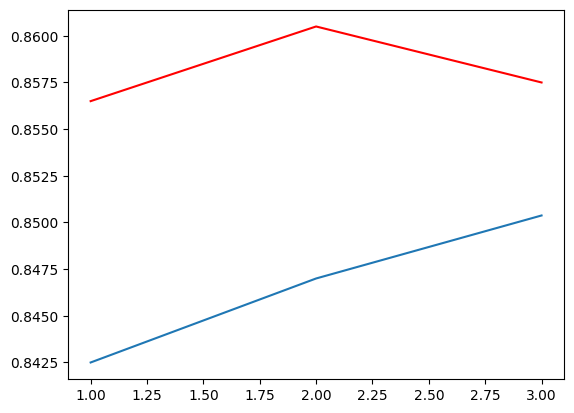

In [169]:
plt.plot([ i for i in range(1,4)],train_accuracy)
plt.plot([ i for i in range(1,4)],test_accuracy,c = "red")